In [ ]:
# Apple width = 8
# Apple length = 8
# banana width = 4
# banana length = 12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.models import Title
from scipy import stats

In [2]:
N = 1000
std = 1
banana_width = np.random.normal(4,std,N)
banana_length = np.random.normal(12,std,N)

apple_width = np.random.normal(8,std,N)
apple_length = np.random.normal(8,std,N)
width = np.concatenate((banana_width,apple_width))
length = np.concatenate((banana_length,apple_length))

In [3]:
x = np.array([width,length]).T
label_banana = np.zeros(N,np.int8)
label_apple = np.ones(N,np.int8)
y = np.concatenate((label_banana,label_apple))

Text(0.5, 1.0, 'The Scatter Chart Data distribution map')

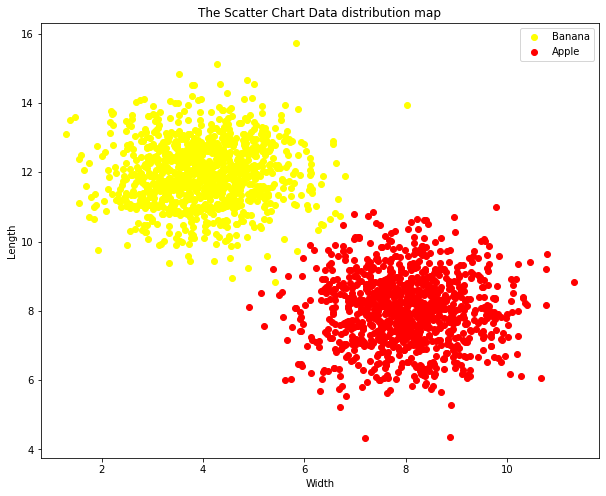

In [4]:
## Matplotlib Scatter

plt.figure(figsize=(10,8))
plt.scatter(x[:N,0],x[:N,1],c= "yellow",label="Banana")
plt.scatter(x[N:,0],x[N:,1],c="red",label="Apple")
plt.legend()
plt.xlabel("Width")
plt.ylabel("Length")
plt.title("The Scatter Chart Data distribution map")

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


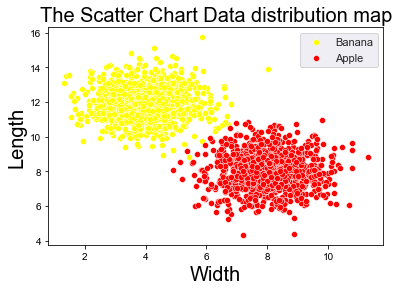

In [5]:
## Seaborn Scatter

sns.scatterplot(x[:N,0],x[:N,1],color="yellow")
sns.scatterplot(x[N:,0],x[N:,1],color="red")
sns.set(rc={'figure.figsize':(10,8)})
p = sns.lineplot()
p.set_xlabel("Width", fontsize = 20)
p.set_ylabel("Length", fontsize = 20)
p.set_title("The Scatter Chart Data distribution map",fontsize = 20)
p.legend(labels = ["Banana","Apple"])

In [7]:
## Bokeh Scatter

output_file("test.html")
p = figure(width=800, height=500)
p.circle(x[:N,0],x[:N,1],color="yellow")
p.circle(x[N:,0],x[N:,1],color="red")
p.title.text = "The Scatter Chart Data distribution map"
p.title.align = "center"
p.title.text_font_size = "25px"
p.add_layout(Title(text="Width", align="center"), "below")
p.add_layout(Title(text="Length", align="center"), "left")
show(p)

Text(0.5, 1.0, 'Bar chart with error')

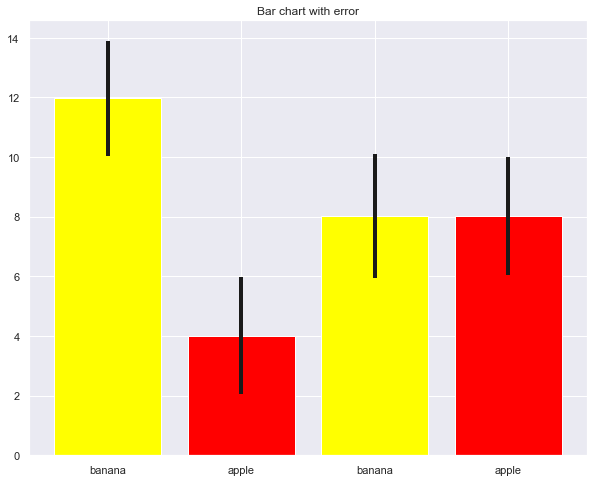

In [8]:
## Bar chart with error bars
labels = ['banana', 'apple', 'banana', 'apple']
a = [1,1.5,2,2.5]
height = [x[:N,1].mean(),x[:N,0].mean(),x[N:,1].mean(),x[N:,0].mean()]
yerr = [(x[:N,1].std())*2,(x[:N,0].std())*2,(x[N:,1].std())*2,(x[N:,0].std())*2]
plt.bar(x=a,height=height,color=["yellow","red","yellow","red"],width=0.4,error_kw={'lw': 4},yerr=yerr)
plt.xticks(ticks=a, labels=labels)
plt.title('Bar chart with error')


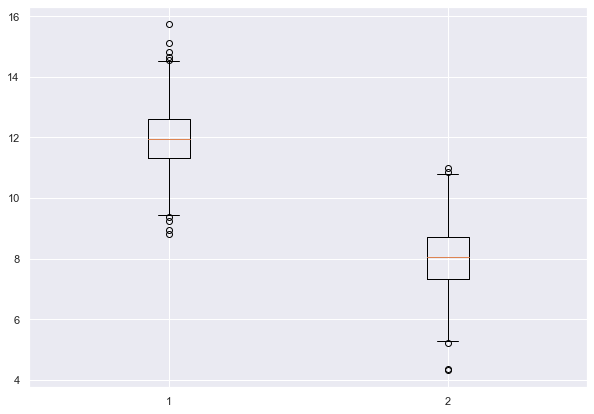

In [9]:
## Box diagram

fig = plt.figure(figsize =(10, 7))
data=[x[:N,1],x[N:,1]]
# Creating plot
plt.boxplot(x=data)
# show plot
plt.show()

Text(0.5, 1.0, 'Box diagram')

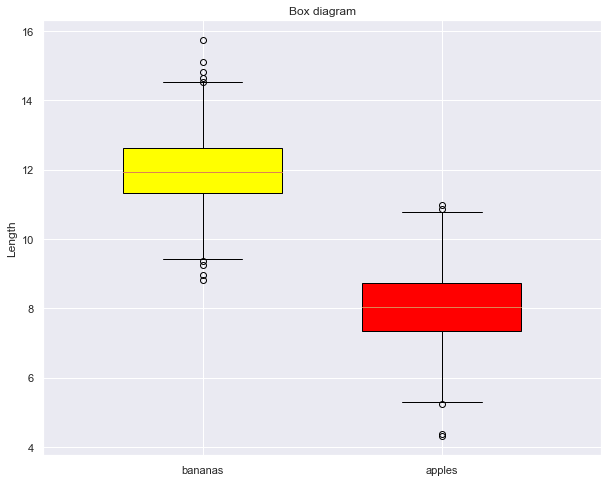

In [10]:
plt.boxplot(x=x[:N,1],patch_artist=True, boxprops={'facecolor': 'yellow'},positions=[0], labels=['bananas'], widths=[0.20])
plt.boxplot(x=x[N:,1],patch_artist=True, boxprops={'facecolor': 'red'},positions=[0.3], labels=['apples'], widths=[0.20])
plt.ylabel('Length')
plt.xlim(-0.2, 0.5)
plt.title('Box diagram')

Text(0.5, 0, 'Width')

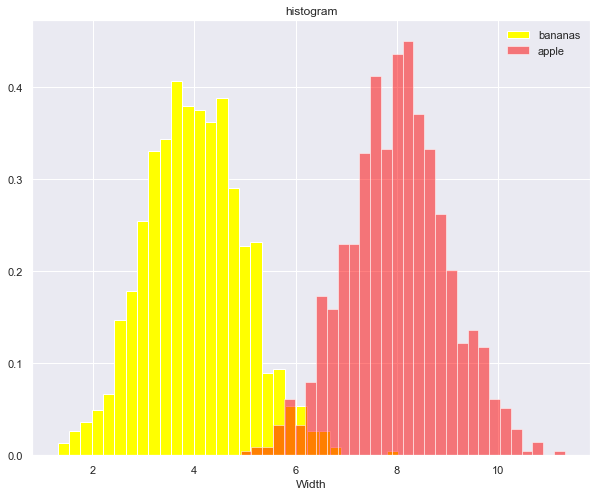

In [11]:
## histogram

plt.hist(x=x[:N,0], bins=30, density=True, color='yellow', label='bananas')
plt.hist(x=x[N:,0], bins=30, density=True, color='red', label='apple',alpha=0.5)
plt.legend(frameon=False)
plt.title('histogram')
plt.xlabel('Width')

C:\Users\akiai\AppData\Local\Temp\ipykernel_9060\357554155.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  _, _, _, mappable = ax.hist2d( x=length_,y=width_,bins=50,cmap=plt.cm.hot)
C:\Users\akiai\AppData\Local\Temp\ipykernel_9060\357554155.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(mappable=mappable, cax=cax, ax=ax)


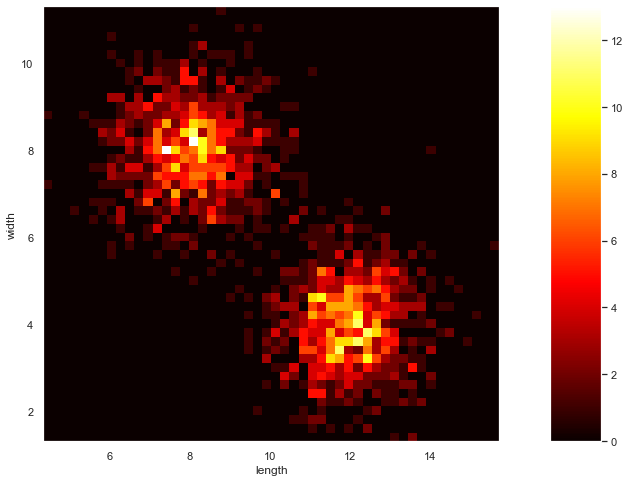

In [12]:
width_ = np.concatenate((x[:N,0],x[N:,0]))
length_ = np.concatenate((x[:N,1],x[N:,1]))

fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d( x=length_,y=width_,bins=50,cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)


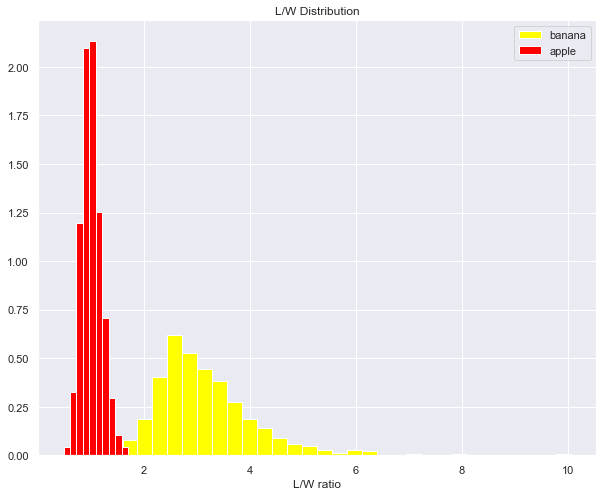

In [13]:
## L/W Distribution

plt.hist(x=banana_length/banana_width,bins=30, density=True, color='yellow', label='banana')
plt.hist(x=apple_length/apple_width,bins=10, density=True, color='red', label='apple')
plt.title('L/W Distribution')
plt.xlabel('L/W ratio')
plt.legend()

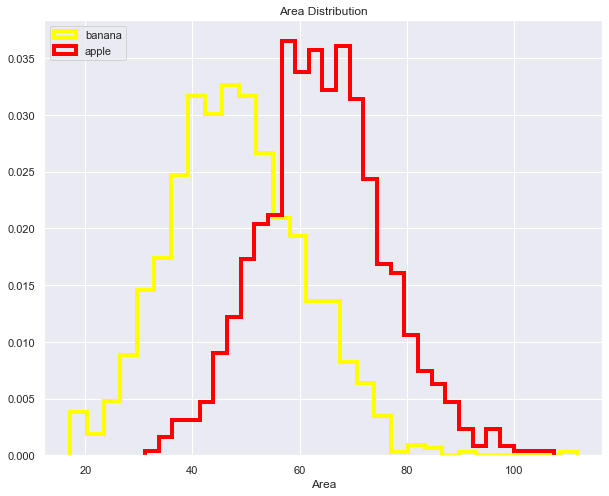

In [14]:
## Area Distribution


plt.hist(x=banana_length*banana_width,histtype='step',lw=4,bins=30,density=True, color='yellow', label='banana')
plt.hist(x=apple_length*apple_width, histtype='step',lw=4,bins=30,density=True, color='red', label='apple')
plt.title('Area Distribution')
plt.xlabel('Area')
plt.legend()

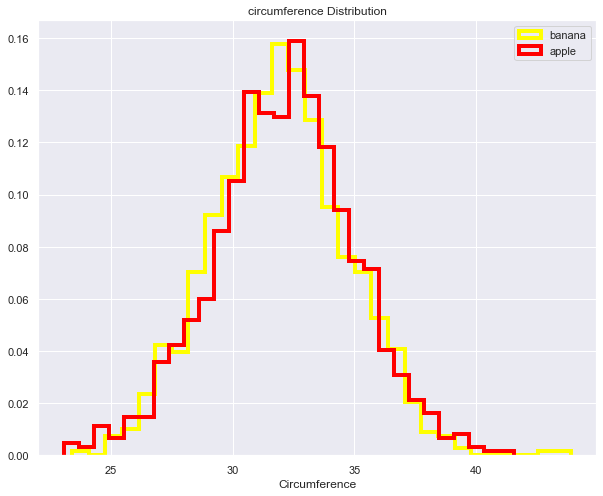

In [15]:
## circumference Distribution


plt.hist(x=2*(banana_length+banana_width),histtype='step', lw=4,bins=30, density=True, color='yellow', label='banana')
plt.hist(x=2*(apple_length+apple_width), histtype='step', lw=4,bins=30, density=True, color='red', label='apple')
plt.title('circumference Distribution')
plt.xlabel('Circumference')
plt.legend()

In [16]:
stats.ttest_ind(banana_length/banana_width,apple_length/apple_width)

Ttest_indResult(statistic=69.23889037622375, pvalue=0.0)

In [17]:
stats.ttest_ind(banana_length*banana_width,apple_length*apple_width)

Ttest_indResult(statistic=-30.390623713907267, pvalue=4.3896145233762726e-167)